In [91]:
# Import DTL
# Import DTL Classifier
from clf.c45 import C45
from clf.utils import read_csv, scale_data, one_hot_encoder
from clf.c45_numeric_handler import process_numeric
from clf.mlp import MyMlp

In [57]:
#Import Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import numpy as np
%matplotlib inline

In [58]:
#Function to Extract Input and Output

def extract_feature_target(data, output):
    y = data[output]
    x = data.drop(output, axis=1)
    #print(x.columns) #optional
    #print(y.head()) #optional
    return x,y

In [59]:
#Function Import Data

def import_data(path, sep=',',dropna=True, drop_duplicates=True):
    data = pd.read_csv(path, sep)
    print("Import Berhasil")
    print("Banyaknya baris dan kolom", data.shape)
    print("Banyaknya data duplicate", data.duplicated().sum())
    data = data.drop_duplicates() if drop_duplicates else data
    data = data.dropna() if dropna else data
#     print(data.head())
    return data

In [60]:
#function to split train test data (default test_size = 0.4)
from sklearn.model_selection import train_test_split

def train_test_data(x,y, _test_size = 0.4): 
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =_test_size,
                                                        random_state =100)
#     print("Training Data :")
#     print(x_train[:5], y_train[:5]) #
#     print("Number of samples : %s" % (len(x_train)))
#     print(" Testing Data :" )
#     print(x_test[:5], y_test[:5]) #
#     print("Number of samples : %s" % (len(x_test)))
    return x_train, x_test, y_train, y_test

In [62]:
#Function to plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [63]:
df = import_data('../Bagian C/datasets/iris.csv',',')

x, y = extract_feature_target(df, ' species')

Import Berhasil
Banyaknya baris dan kolom (150, 5)
Banyaknya data duplicate 3


In [64]:
y

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name:  species, Length: 147, dtype: object

## Split Training and Testing

In [65]:
x_temp = process_numeric(np.vectorize(str)(x), y)
x_train, x_test, y_train, y_test = train_test_data(x_temp, y, _test_size=0.1)

## Train C45

In [66]:
# Create MyC45
myc45 = C45()
myc45.label = list(x.columns)
x_train[0:1,:]

array([['> 4.9', '<= 3.8', '> 1.9', '> 0.6']], dtype='<U6')

In [67]:
myc45.fit(x_train,y_train.values)

## Find accuracy and confusion matrix

In [68]:
x_test[0:1,:]

array([['> 4.9', '<= 3.8', '> 1.9', '> 0.6']], dtype='<U6')

In [73]:
y_prediction = myc45.predict(x_test)
y_prediction

array([' versicolor', ' setosa', ' versicolor', ' versicolor', ' setosa',
       ' versicolor', ' versicolor', ' versicolor', ' setosa',
       ' versicolor', ' versicolor', ' versicolor', ' setosa',
       ' versicolor', ' setosa'], dtype='<U32')

In [70]:
y_array = np.array(y_test)
y_array

array([' virginica', ' setosa', ' virginica', ' virginica', ' setosa',
       ' virginica', ' virginica', ' virginica', ' setosa', ' virginica',
       ' virginica', ' versicolor', ' setosa', ' virginica', ' setosa'],
      dtype=object)

In [76]:
accuracy = accuracy_score(y_array, y_prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4


In [79]:
cmatrix = confusion_matrix(y_array, y_prediction, labels=[" virginica", " setosa", " versicolor"])
cmatrix

array([[0, 0, 9],
       [0, 5, 0],
       [0, 0, 1]])

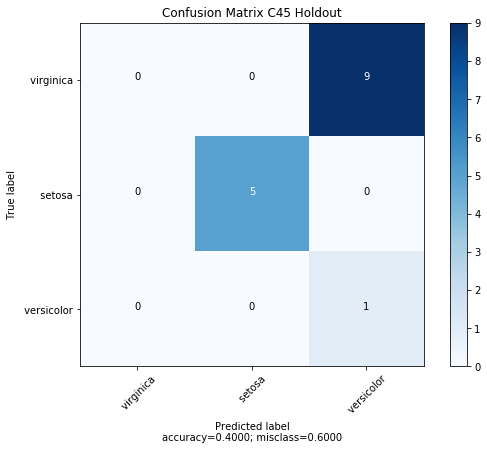

In [83]:
plot_confusion_matrix(cmatrix, [" virginica", " setosa", " versicolor"], title="Confusion Matrix C45 Holdout", normalize=False)

## Split Training and Testing

In [134]:
x_train, x_test, y_train, y_test = train_test_data(x, y, _test_size=0.1)
x_train, x_test = np.array(x_train), np.array(x_test)

## Train ANN

In [195]:
# Create MyMlp
input_layer_size = x_train[0:1,:].size
output_layer_size = 3
hidden_layer_size = [4,3]
print(f"Input layer size: {input_layer_size}. Output layer size: {output_layer_size}")

mymlp = MyMlp(input_layer_size, hidden_layer_size, output_layer_size, epochs=1000, learning_rate=0.5)
x_train[0:1,:]

Input layer size: 4. Output layer size: 3


array([[7.9, 3.8, 6.4, 2. ]])

In [196]:
mymlp.fit(x_train, y_train)

## Find accuracy and confusion matrix

In [197]:
x_test[0:1,:]

array([[5.8, 2.8, 5.1, 2.4]])

In [198]:
y_prediction = mymlp.predict(x_test)
y_prediction

array([' virginica', ' setosa', ' virginica', ' virginica', ' setosa',
       ' virginica', ' virginica', ' virginica', ' setosa', ' virginica',
       ' virginica', ' versicolor', ' setosa', ' virginica', ' setosa'],
      dtype='<U11')

In [199]:
y_array = np.array(y_test)
y_array

array([' virginica', ' setosa', ' virginica', ' virginica', ' setosa',
       ' virginica', ' virginica', ' virginica', ' setosa', ' virginica',
       ' virginica', ' versicolor', ' setosa', ' virginica', ' setosa'],
      dtype=object)

In [200]:
accuracy = accuracy_score(y_array, y_prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [201]:
cmatrix = confusion_matrix(y_array, y_prediction, labels=[" virginica", " setosa", " versicolor"])
cmatrix

array([[9, 0, 0],
       [0, 5, 0],
       [0, 0, 1]])

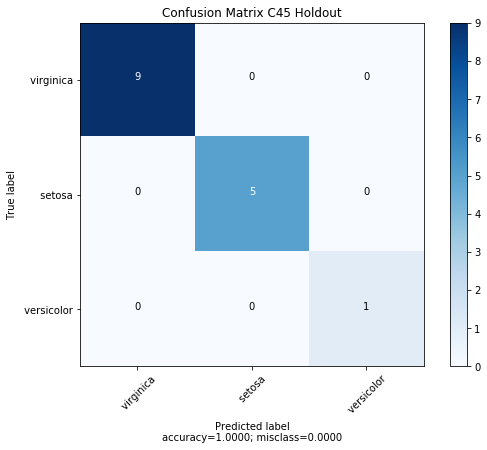

In [202]:
plot_confusion_matrix(cmatrix, [" virginica", " setosa", " versicolor"], title="Confusion Matrix C45 Holdout", normalize=False)